In [1]:
import pandas as pd
import utils
data_dir = 'data'
data_url= 'https://covid.ourworldindata.org/data/owid-covid-data.csv'
filename = 'owid-covid-data.csv'
dest_path = utils.fetch_and_cache(data_url = data_url, file = filename, data_dir = data_dir)

#file = pd.read_csv(filename)

Using version already downloaded: Tue Oct  5 11:13:54 2021
MD5 hash of file: 30091a4d5ba8ef9a288668d0e469774c


In [2]:
import os
size = os.stat('data/owid-covid-data.csv')
print(size)

os.stat_result(st_mode=33206, st_ino=31806672368399542, st_dev=981754047, st_nlink=1, st_uid=0, st_gid=0, st_size=33214847, st_atime=1633447344, st_mtime=1633446834, st_ctime=1633446834)


In [3]:
import pathlib
size= pathlib.Path('data/owid-covid-data.csv').stat()
print(size)
print(size[6])

os.stat_result(st_mode=33206, st_ino=31806672368399542, st_dev=981754047, st_nlink=1, st_uid=0, st_gid=0, st_size=33214847, st_atime=1633447344, st_mtime=1633446834, st_ctime=1633446834)
33214847


In [4]:
import itertools
from itertools import islice

li = [2,4,5,7,8,10,20]
print(list(itertools.islice(li,1,6,2)))

[4, 7, 10]


In [10]:
import utils
from utils import *
import numpy as np

line_num = line_count('data/owid-covid-data.csv')
print(line_num)

sub_line_num = int(np.ceil(float(line_num)/10)) #calcuating how many lines each group should contain if we have 10 groups

filename = 'data/owid-covid-data.csv'
for i in range(10):
    with open(filename, 'r') as f:
        fw = open('data/owid-covid-data_%d.csv' %(i+1), 'w') #this is indicating the new files
        #group0: [0, sub_line_num]
        #group1: [sub_line_num, sub_line_num*2]
        sliced_f = itertools.islice(f, i*sub_line_num, min((i+1)*sub_line_num, line_num))
        
        for line in sliced_f: #for each line were writing it into a new file
            fw.write(line)

121248


In [11]:
print(head('data/owid-covid-data_1.csv')) #this is just hte column names!

['iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_olde

In [13]:
calls = pd.read_csv('data/owid-covid-data_2.csv')
display(calls) #column names are gibberish, we want the real column names present!

,BLZ,North America,Belize,2021-07-12,13561.0,43.0,24.286,331.0,1.0,0.143,...,Unnamed: 55,Unnamed: 56,90.083,1.3,74.62,0.716,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64
0,BLZ,North America,Belize,2021-07-13,13587.0,26.0,25.429,331.0,0.0,0.143,...,NaN,NaN,90.083,1.3,74.62,0.716,NaN,NaN,NaN,NaN
1,BLZ,North America,Belize,2021-07-14,13613.0,26.0,24.143,331.0,0.0,0.143,...,NaN,NaN,90.083,1.3,74.62,0.716,NaN,NaN,NaN,NaN
2,BLZ,North America,Belize,2021-07-15,13644.0,31.0,24.000,332.0,1.0,0.286,...,NaN,NaN,90.083,1.3,74.62,0.716,NaN,NaN,NaN,NaN
3,BLZ,North America,Belize,2021-07-16,13683.0,39.0,23.571,332.0,0.0,0.286,...,NaN,NaN,90.083,1.3,74.62,0.716,NaN,NaN,NaN,NaN
4,BLZ,North America,Belize,2021-07-17,13683.0,0.0,23.571,332.0,0.0,0.286,...,NaN,NaN,90.083,1.3,74.62,0.716,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12119,COM,Africa,Comoros,2020-11-08,563.0,0.0,2.571,7.0,0.0,0.000,...,4.4,23.6,15.574,2.2,64.32,0.554,NaN,NaN,NaN,NaN
12120,COM,Africa,Comoros,2020-11-09,563.0,0.0,2.571,7.0,0.0,0.000,...,4.4,23.6,15.574,2.2,64.32,0.554,NaN,NaN,NaN,NaN
12121,COM,Africa,Comoros,2020-11-10,569.0,6.0,3.429,7.0,0.0,0.000,...,4.4,23.6,15.574,2.2,64.32,0.554,NaN,NaN,NaN,NaN
12122,COM,Africa,Comoros,2020-11-11,569.0,0.0,2.143,7.0,0.0,0.000,...,4.4,23.6,15.574,2.2,64.32,0.554,NaN,NaN,NaN,NaN


In [14]:
with open(filename, 'r') as f:
    csv_header = list(itertools.islice(f,1 ))[0] #first line, and then grab the csv headers
print(csv_header)

iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,

In [17]:
for i in range(10):
    with open(filename, 'r') as f:
        #Now we add teh column headers to the top of or other files
        fw = open('data/owid-covid-data_%d.csv' %(i+1), 'w')
        sliced_f = itertools.islice(f, i*sub_line_num, min((i+1)*sub_line_num, line_num))
        if i > 0:
            fw.write(csv_header) #write hte csv header, then add the other lines
        for line in sliced_f:
            fw.write(line)

In [19]:
#computer sales kernal density function
import numpy as py
import matplotlib as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set()
sns.set_context('talk')
%matplotlib inline

In [20]:
df = pd.read_csv('ComputerSales.csv')

In [21]:
df.head()

,Sale ID,Contact,Sex,Age,State,Product ID,Product Type,Sale Price,Profit,Lead,Month,Year
0,1,Paul Thomas,M,43,OH,M01-F0024,Desktop,479.99,143.39,Website,January,2018
1,2,Margo Simms,F,37,WV,GT13-0024,Desktop,1249.99,230.89,Flyer 4,January,2018
2,3,Sam Stine,M,26,PA,I3670,Desktop,649.99,118.64,Website,February,2018
3,4,Moe Eggert,M,35,PA,I3593,Laptop,399.99,72.09,Website,March,2018
4,5,Jessica Elk,F,55,PA,15M-ED,Laptop,699.99,98.09,Flyer 4,March,2018


Text(0.5, 1.0, ' Count of each age')

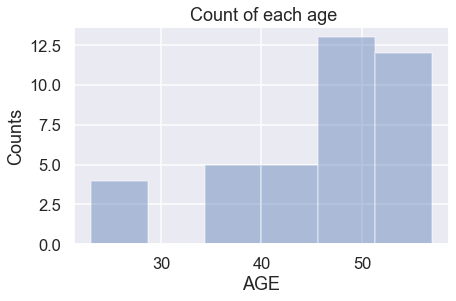

In [22]:
#plot histogram by the age column

#plt.figure(figsize = (15,5))
ax = sns.distplot(df['Age'], kde = False)
ax.set_xlabel('AGE')
ax.set_ylabel('Counts')
ax.set_title(' Count of each age')

In [23]:
df['Age'].value_counts().sort_index()

23    3
26    1
35    3
37    2
43    2
45    3
46    6
49    4
51    3
52    2
54    2
55    2
56    3
57    3
Name: Age, dtype: int64

Text(0.5, 1.0, ' Count of each price')

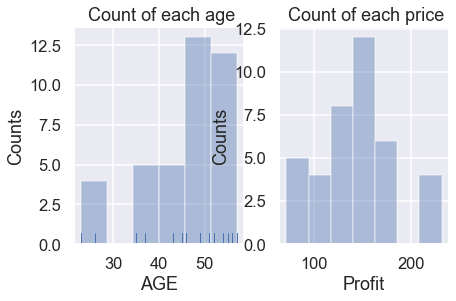

In [25]:
#plot histogram by the age column
import matplotlib.pyplot as plt

#plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
ax = sns.distplot(df['Age'], kde = False, rug = True)
ax.set_xlabel('AGE')
ax.set_ylabel('Counts')
ax.set_title(' Count of each age')
plt.subplot(122)
ax = sns.distplot(df['Profit'], kde = False)
ax.set_xlabel('Profit')
ax.set_ylabel('Counts')
ax.set_title(' Count of each price')



In [26]:
#plot a kdf

def k_func(alpha, x, z):
    coefficient = 1/np.sqrt(np.pi)
    y = np.exp(-(x-z)**2/alpha)
    return coefficient *y

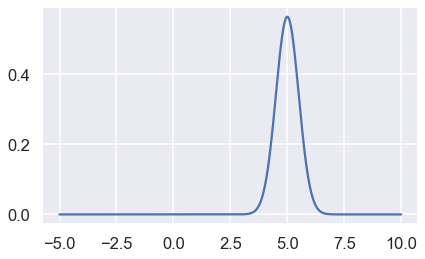

In [29]:
z = 5
alpha = 0.5
x_lst = np.linspace(-5, 10, 500)
k_alpha = [k_func(alpha,x,z) for x in x_lst]
k_beta = [k_func(alpha,x,z) for x in x_lst]

plt.plot(x_lst, k_alpha)

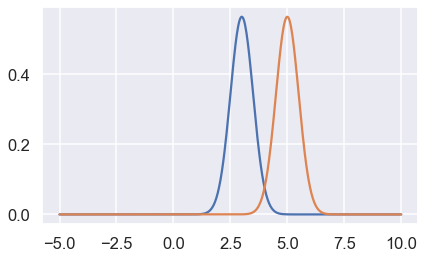

In [33]:
z = 5
alpha = 0.5
x_lst = np.linspace(-5, 10, 500)
k_alpha = [k_func(alpha,x,3) for x in x_lst]
k_beta = [k_func(alpha,x,5) for x in x_lst]
plt.plot(x_lst, k_alpha, x_lst, k_beta)

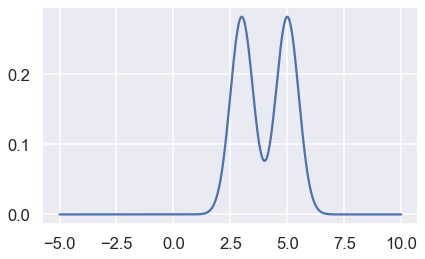

In [34]:
k2centers = (np.array(k_alpha)+ np.array(k_beta))/2
plt.plot(x_lst, k2centers)

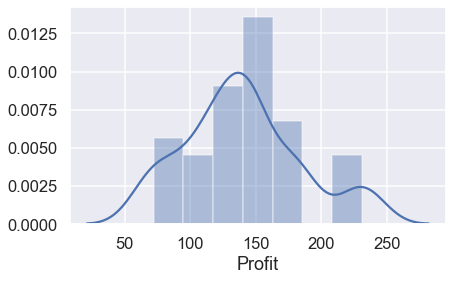

In [35]:
ax = sns.distplot(df.Profit) #this is a historgram of the kde

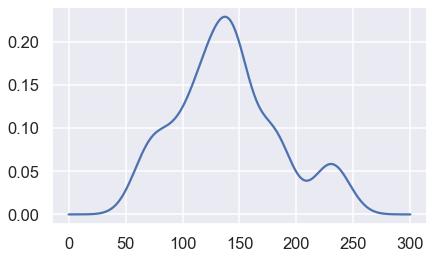

In [38]:
#manually plotting
x_lst = np.linspace(0,300,1000)
profit = df.Profit.values
k_profit = np.zeros(1000)
alpha = 500
for z in profit:
    k_curr = k_func(alpha, x_lst, z)
    k_profit += k_curr
    
k_profit = k_profit/len(df)
plt.plot(x_lst, k_profit)    
    

In [42]:
def kde_plot(kernal_function, alpha):
    x_lst = np.linspace(0,300, 1000)
    k_profit = np.zeros(1000)
    
    for index, row in df.iterrows():
        k_curr = kernal_function(alpha, x_lst, row.Profit)
        k_profit += np.array(k_curr)
    k_profit = k_profit/len(df)
    plt.plot(x_lst, k_profit)

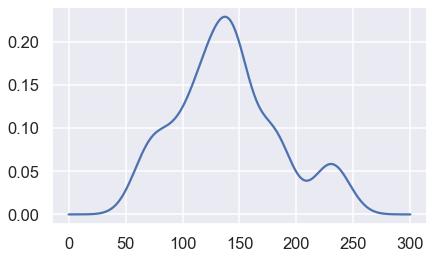

In [43]:
kde_plot(k_func, 500)